In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")
from jupyterthemes import jtplot
jtplot.style(theme='monokai', ticks=True, grid=True)

### Source:

Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.


### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are WHOLESALERS.


### Attribute Information:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

# Data importing

In [2]:
df = pd.read_csv('dataa.csv',encoding="ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Exploratory data

In [3]:
# we can see in the "Description" and "CustomerID" columns has different sum of data, 
# wich means this columns are likely to have misssing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# checking overall data to get a better understanding of  oour data set
listFeat = []
for col in df.columns:
    listFeat.append([col, df[col].dtype, df[col].isna().sum(), (df[col].isna().sum()/len(df[col]))*100,
                    df[col].nunique(), df[col].drop_duplicates().sample(2).values ])

dfDesrciption = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPercentage', 'unique', 'uniqueSample'],
                            data=listFeat)
dfDesrciption

,dataFeatures,dataType,null,nullPercentage,unique,uniqueSample
0,InvoiceNo,object,0,0.000000,25900,"[566394, 539300]"
1,StockCode,object,0,0.000000,4070,"[46000P, 23186]"
2,Description,object,1454,0.268311,4223,"[SMALL RED RETROSPOT WINDMILL, SET OF 2 CERAMI..."
3,Quantity,int64,0,0.000000,722,"[310, -335]"
4,InvoiceDate,object,0,0.000000,23260,"[3/24/2011 11:24, 10/24/2011 13:39]"
5,UnitPrice,float64,0,0.000000,1630,"[822.94, 197.74]"
6,CustomerID,float64,135080,24.926694,4372,"[14841.0, 16778.0]"
7,Country,object,0,0.000000,38,"[Netherlands, France]"


from this tabel we could see we have a total of CustomerID (Unique customers) of 4372.

with percentage of missing value from column "Description" 0.26 % and the value from column "CustomersID" 24.92%

with total unique value on "quantity" about 722 wich means people have bought products in variative and wide range of quantity on buying products



## Data Preprocessing

In [5]:
#checking how many nun values are int the data
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

> one of our goal is to segment customers and clasify them into groups so we could make a better 
> decision bisnis targeting specific segment customer.
> wich means nan values in this column needs to be droped, 
> because there is no purpose in keeping nan value in "custmersID" and it seem if we try to fill it, it wpuld be hard to get an accurate data

> as we know column Description has missing value but it seems we wont be using this information so we can leave and drop those nan values.


In [6]:
#droping nan value in CustomerID
df.dropna(subset=['CustomerID'], inplace= True)

In [7]:
#validating and no nun values
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### choosing country

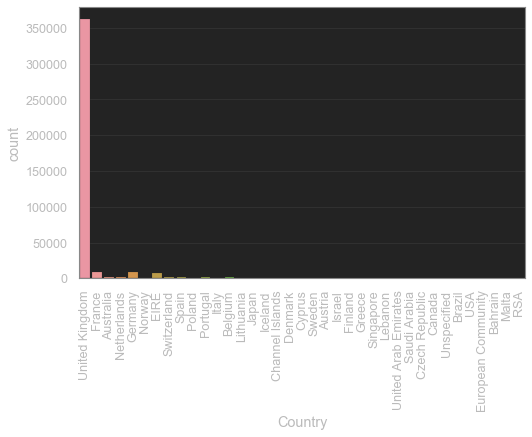

In [8]:
# lets see wich country is the most frequent in this data set

plt.figure(figsize=(8,5))
sns.countplot(x="Country",data = df)
plt.xticks(rotation=90)
plt.show()

In [9]:
percent_uk = (len(df[df['Country'] == 'United Kingdom'])/ len(df)) * 100
print(f'Percentage purchase from United Kingdom :{percent_uk} %')

Percentage purchase from United Kingdom :88.95088599878574 %


> we could see the United Kingdoms is the most frequent country in this dataset. to get some insights of the segment customer
> we are only going to use UK in this case to avoid some outlier data or biased because i assume different country has different
> purchasing habit, that would affect our value in segmenting customers.

In [10]:
#choosing only uk
df_En = df[df.Country == 'United Kingdom']
df_En

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


### removing duplicate data

In [11]:
# check duplicate data 
print(len(df_En[df_En.duplicated()]))
#removing duplicate data
df_En.drop_duplicates(inplace = True)

5150


### removing negative quantity 

In [12]:
# finding more insight
df_En.describe()

,Quantity,UnitPrice,CustomerID
count,356728.000000,356728.000000,356728.000000
mean,11.198644,3.268255,15543.795284
std,264.998044,71.162330,1594.286219
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14191.000000
50%,4.000000,1.950000,15513.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


> we can see there is one column with negative value and that is the quantity column.
> the quantity column is The quantities of each product (item) per transaction
> this negative value does not
make sense
> i assume thet there are some kind of cancelation transaction in our data set based on this negative value

In [13]:
df_En = df_En[df_En['Quantity']>0]
df_En.describe()

,Quantity,UnitPrice,CustomerID
count,349227.000000,349227.000000,349227.000000
mean,12.181295,2.972124,15548.333625
std,191.797470,17.990307,1594.403077
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,14191.000000
50%,4.000000,1.950000,15518.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


### removing value "c" (cancelation) inside InvoiceNo

from the Attribute informaton we can see in the "InvoiceNo" column there are information about cancelation. 


we need to remove any InvoiceNo with the letter "c" in it. column invoice data with "C" means purchase  canceled

In [14]:
#checking InvoiceNO "C" with quantity that are postive incase they exist

total_status_c = df_En['InvoiceNo'].apply(lambda x:'C' in x)
print(f'InvoiceNO "C" with positive quantity : {(df_En.loc[total_status_c,"Quantity"] >= 0).any()}')
print(f'InvoiceNO "C" with negatif quantity : {(df_En.loc[total_status_c,"Quantity"] < 0).any()}')

InvoiceNO "C" with positive quantity : False
InvoiceNO "C" with negatif quantity : False


>we can conlude our data has no "C", this is due all the negative Quantity has been droped in the removing negative value step

In [15]:
#selecting a sample customerID with the a spesific description

df_En[(df_En['CustomerID'] == 15311) & (df_En['Quantity'] > 0 )]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,12/1/2010 9:41,4.25,15311.0,United Kingdom
107,536381,84854,GIRLY PINK TOOL SET,5,12/1/2010 9:41,4.95,15311.0,United Kingdom
108,536381,22411,JUMBO SHOPPER VINTAGE RED PAISLEY,10,12/1/2010 9:41,1.95,15311.0,United Kingdom
109,536381,82567,"AIRLINE LOUNGE,METAL SIGN",2,12/1/2010 9:41,2.10,15311.0,United Kingdom
110,536381,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,6,12/1/2010 9:41,1.25,15311.0,United Kingdom
...,...,...,...,...,...,...,...,...
541746,581571,23167,SMALL CERAMIC TOP STORAGE JAR,96,12/9/2011 12:00,0.69,15311.0,United Kingdom
541747,581571,21314,SMALL GLASS HEART TRINKET POT,48,12/9/2011 12:00,1.85,15311.0,United Kingdom
541748,581571,21137,BLACK RECORD COVER FRAME,24,12/9/2011 12:00,3.39,15311.0,United Kingdom
541749,581571,44234,ASSORTED CIRCULAR MOBILE,1,12/9/2011 12:00,0.21,15311.0,United Kingdom


it is confimed from the table above that we dont have any "C" value and negatif value

# UNSUPERVISED MODELING

## Recency, frequency monetary

segmenting customers is a valuable information and is a great tool to make more accurate strategy bisnis to reach the right
customers and beeing more efficient.
one of the tools in segmenting customers is recency, frequency, monetary (RFM). by finding RFM value we can classify the data
using machine learning.

Low Value- Customers who are less active than others, not very frequent buyer/visitor and generates very low — zero — maybe negative revenue.


Mid Value- Customers who are fairly frequent and generates moderate revenue.


High Value- Customers with High Revenue, Frequency and low Inactivity; business always want to retain these customers.

### changing data type

In [16]:
#
df_En['InvoiceDate'] = pd.to_datetime(df_En['InvoiceDate'])
df_En['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541889   2011-12-09 12:31:00
541890   2011-12-09 12:49:00
541891   2011-12-09 12:49:00
541892   2011-12-09 12:49:00
541893   2011-12-09 12:49:00
Name: InvoiceDate, Length: 349227, dtype: datetime64[ns]

In [17]:

df_En['InvoiceDate'] = pd.to_datetime(df_En['InvoiceDate']).dt.date
df_En['InvoiceDate']

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541889    2011-12-09
541890    2011-12-09
541891    2011-12-09
541892    2011-12-09
541893    2011-12-09
Name: InvoiceDate, Length: 349227, dtype: object

In [18]:
# df_En['InvoiceDate'] = pd.to_datetime(df_En['InvoiceDate'])
df_En['CustomerID'] = df_En['CustomerID'].astype('int64')
df_En.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

### finding RFM

In [19]:
#refference for getting recency, lets say new year
from datetime import timedelta
df_En['date_reference'] = df_En['InvoiceDate'].max() + pd.DateOffset(1)
df_En['date_reference']

# snapshot_date = online['InvoiceDate'].max() + timedelta(days=1)

0        2011-12-10
1        2011-12-10
2        2011-12-10
3        2011-12-10
4        2011-12-10
            ...    
541889   2011-12-10
541890   2011-12-10
541891   2011-12-10
541892   2011-12-10
541893   2011-12-10
Name: date_reference, Length: 349227, dtype: datetime64[ns]

In [20]:
# we need to have the last time a customer purchesd an item
# and we need to get a reference date so we can get recency value, i will use early year 2012 as a reference

print(f" last time purchase : {df_En['InvoiceDate'].max()}")
print(f" reference date : {df_En['date_reference']}")

 last time purchase : 2011-12-09
 reference date : 0        2011-12-10
1        2011-12-10
2        2011-12-10
3        2011-12-10
4        2011-12-10
            ...    
541889   2011-12-10
541890   2011-12-10
541891   2011-12-10
541892   2011-12-10
541893   2011-12-10
Name: date_reference, Length: 349227, dtype: datetime64[ns]


In [21]:
df_En['InvoiceDate'] = pd.to_datetime(df_En['InvoiceDate'])
df_En['InvoiceDate']

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541889   2011-12-09
541890   2011-12-09
541891   2011-12-09
541892   2011-12-09
541893   2011-12-09
Name: InvoiceDate, Length: 349227, dtype: datetime64[ns]

In [22]:
df_En.dtypes

InvoiceNo                 object
StockCode                 object
Description               object
Quantity                   int64
InvoiceDate       datetime64[ns]
UnitPrice                float64
CustomerID                 int64
Country                   object
date_reference    datetime64[ns]
dtype: object

In [23]:
#mendapatkan revenue dengan mengalikan quantity dan unit price
#mendapatkan recency  date reference dan invoice data
#dibuat data frame
df_En['Monetary'] = df_En['Quantity'] * df_En['UnitPrice']
df_En['Recency'] = df_En['date_reference'] - df_En['InvoiceDate']


In [24]:
df_En['InvoiceDate'] = pd.to_datetime(df_En['InvoiceDate']).dt.date
df_En['InvoiceDate']

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541889    2011-12-09
541890    2011-12-09
541891    2011-12-09
541892    2011-12-09
541893    2011-12-09
Name: InvoiceDate, Length: 349227, dtype: object

In [25]:
df_En.dtypes

InvoiceNo                  object
StockCode                  object
Description                object
Quantity                    int64
InvoiceDate                object
UnitPrice                 float64
CustomerID                  int64
Country                    object
date_reference     datetime64[ns]
Monetary                  float64
Recency           timedelta64[ns]
dtype: object

In [26]:
#rubah lagi datetiime to numeric agar bisa dilakukan perhitungan
df_En['Recency'] = df_En['Recency'].dt.days
# df_En[['Recency','Revenue']]

In [27]:
# df_En[['Recency','Revenue']].dtypes

In [28]:
#melakukan group di level invoice dan dilakukan penjumlahan revenue dan pengurangan date time di ambil yang paling kecil karena kita pingin melihat data terhir
#hali ini dilakukan agar kita bisa melihat custo
df_invoice_grouped = df_En.groupby(['InvoiceNo','CustomerID'],as_index=False).agg({'Recency': 'min',
                                'Monetary' : 'sum'
                                })

In [29]:
df_invoice_grouped['Frequency'] = 1
df_invoice_grouped

,InvoiceNo,CustomerID,Recency,Monetary,Frequency
0,536365,17850,374,139.12,1
1,536366,17850,374,22.20,1
2,536367,13047,374,278.73,1
3,536368,13047,374,70.05,1
4,536369,13047,374,17.85,1
...,...,...,...,...,...
16644,581582,17581,1,29.88,1
16645,581583,13777,1,124.60,1
16646,581584,13777,1,140.64,1
16647,581585,15804,1,329.05,1


In [30]:
df_customerID_grouped = df_invoice_grouped.groupby('CustomerID',as_index=False).agg({'Recency': 'min',
                                                             'Monetary' : 'sum',
                                                             'Frequency' : 'count'   
                                                              })

In [31]:
df_customerID_grouped

,CustomerID,Recency,Monetary,Frequency
0,12346,326,77183.60,1
1,12747,3,4196.01,11
2,12748,1,33053.19,210
3,12749,4,4090.88,5
4,12820,4,942.34,4
...,...,...,...,...
3916,18280,278,180.60,1
3917,18281,181,80.82,1
3918,18282,8,178.05,2
3919,18283,4,2045.53,16


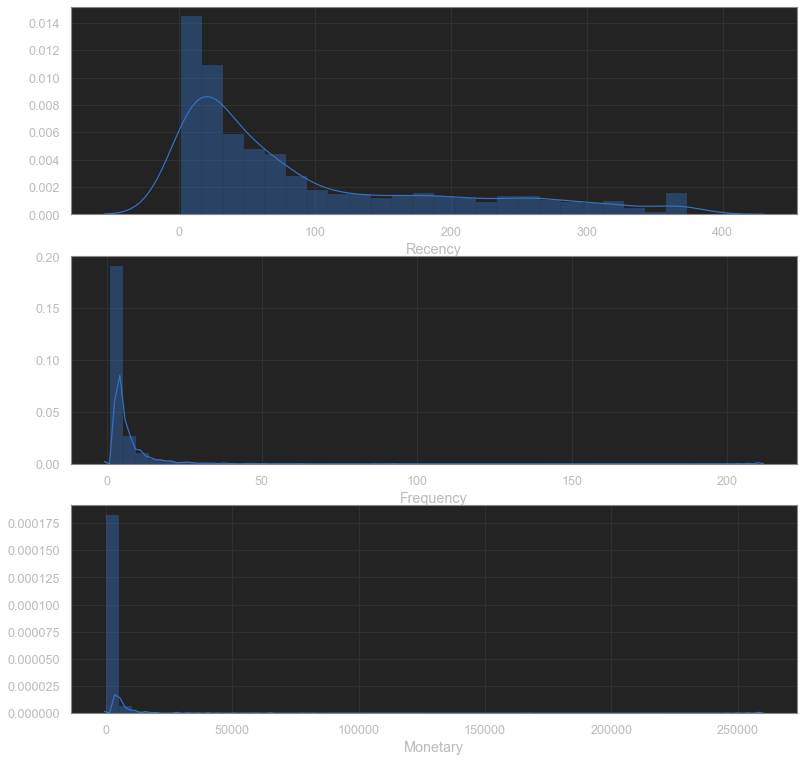

In [32]:
# Plot RFM distributions
plt.figure(figsize=(13,13))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df_customerID_grouped['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df_customerID_grouped['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df_customerID_grouped['Monetary'])
# Show the plot
plt.show()

> we can conlude from the distribution plot the data is skewed

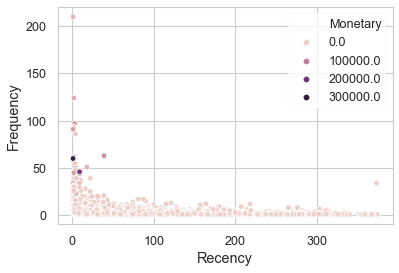

In [33]:
sns.set_style('whitegrid')
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="Recency", y="Frequency",
                     hue="Monetary", data=df_customerID_grouped)

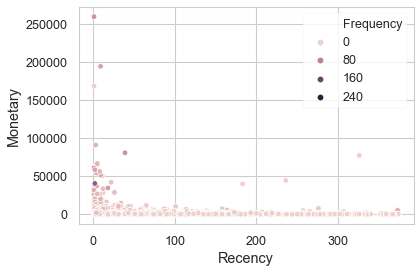

In [34]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="Recency", y="Monetary",
                     hue="Frequency", data=df_customerID_grouped)

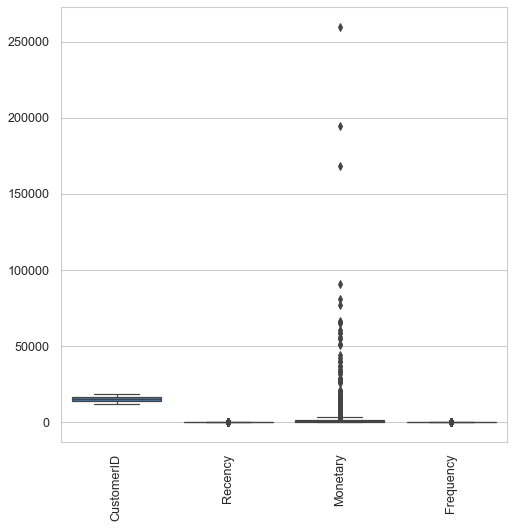

In [35]:
plt.figure(figsize = (8,8))
plt.xticks(rotation = 90)
sns.boxplot(data = df_customerID_grouped)

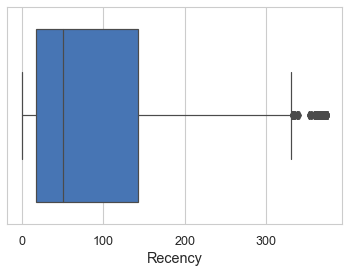

In [36]:
# df_customerID_grouped
sns.boxplot(df_customerID_grouped['Recency'])

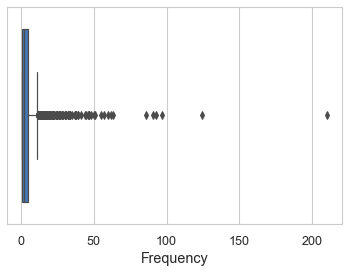

In [37]:
sns.boxplot(df_customerID_grouped['Frequency'])

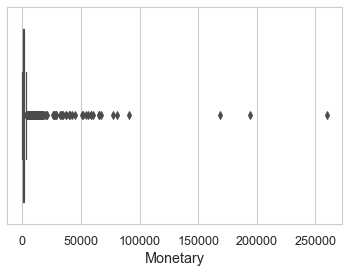

In [39]:
sns.boxplot(df_customerID_grouped['Monetary'])

# Standard Scaller

we are going to use dbscan to di an supercised machine learning so we can give label of segment customer. to get better data we can use 
standard scaler first

In [40]:
df_customerID_grouped_scale = df_customerID_grouped.copy()

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_customerID_grouped_scale[['Recency','Frequency','Monetary']] = scaler.fit_transform(df_customerID_grouped_scale[['Recency','Frequency','Monetary']])

In [42]:
df_customerID_grouped_scale

,CustomerID,Recency,Monetary,Frequency
0,12346,2.344127,10.074607,-0.450546
1,12747,-0.901588,0.312709,0.937411
2,12748,-0.921685,4.172281,28.557767
3,12749,-0.891539,0.298648,0.104637
4,12820,-0.891539,-0.122461,-0.034159
...,...,...,...,...
3916,18280,1.861791,-0.224341,-0.450546
3917,18281,0.887072,-0.237687,-0.450546
3918,18282,-0.851345,-0.224682,-0.311751
3919,18283,-0.891539,0.025088,1.631390


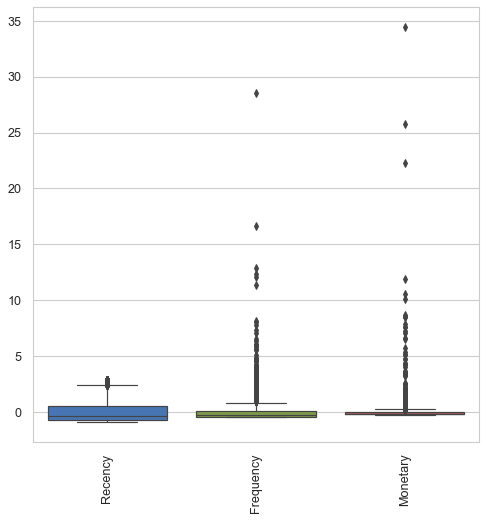

In [44]:
plt.figure(figsize = (8,8))
plt.xticks(rotation = 90)
sns.boxplot(data = df_customerID_grouped_scale[['Recency','Frequency','Monetary']])

In [45]:
df_customerID_grouped_scale

,CustomerID,Recency,Monetary,Frequency
0,12346,2.344127,10.074607,-0.450546
1,12747,-0.901588,0.312709,0.937411
2,12748,-0.921685,4.172281,28.557767
3,12749,-0.891539,0.298648,0.104637
4,12820,-0.891539,-0.122461,-0.034159
...,...,...,...,...
3916,18280,1.861791,-0.224341,-0.450546
3917,18281,0.887072,-0.237687,-0.450546
3918,18282,-0.851345,-0.224682,-0.311751
3919,18283,-0.891539,0.025088,1.631390


# Clustering With DBSCAN (Density-Based Spatial Clustering Algorithm with Noise)

-  df_customerID_grouped_scale : a copy of df_customerID_grouped (scaled)
-  dfDBSCAN : a copy of df_customerID_grouped_scale (scaled)
-  dbscan : model DBSCAN and fitting

In [46]:
dfDBSCAN = df_customerID_grouped_scale.copy()

In [50]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps= 0.5, min_samples=5).fit(dfDBSCAN[['Recency','Frequency','Monetary']])

In [51]:
dbscan.labels_

array([-1,  0, -1, ...,  0,  0,  0], dtype=int64)

In [52]:
dfDBSCAN['Category'] = dbscan.labels_
dfDBSCAN

,CustomerID,Recency,Monetary,Frequency,Category
0,12346,2.344127,10.074607,-0.450546,-1
1,12747,-0.901588,0.312709,0.937411,0
2,12748,-0.921685,4.172281,28.557767,-1
3,12749,-0.891539,0.298648,0.104637,0
4,12820,-0.891539,-0.122461,-0.034159,0
...,...,...,...,...,...
3916,18280,1.861791,-0.224341,-0.450546,0
3917,18281,0.887072,-0.237687,-0.450546,0
3918,18282,-0.851345,-0.224682,-0.311751,0
3919,18283,-0.891539,0.025088,1.631390,0


In [54]:
dfDBSCAN.Category.value_counts()

 0    3863
-1      53
 1       5
Name: Category, dtype: int64

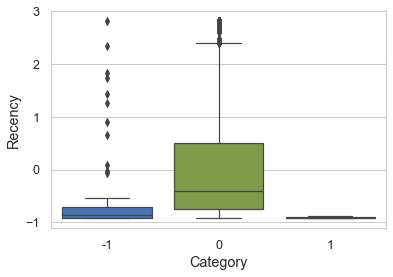

In [58]:
sns.boxplot(dfDBSCAN['Category'],dfDBSCAN.Recency)

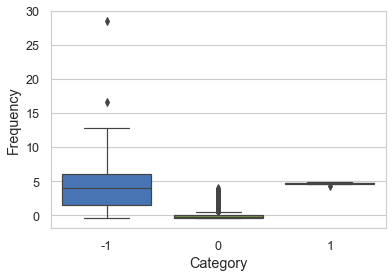

In [59]:
sns.boxplot(dfDBSCAN['Category'],dfDBSCAN.Frequency)

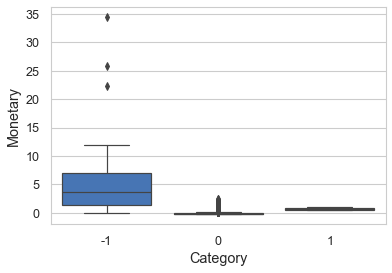

In [60]:
sns.boxplot(dfDBSCAN['Category'],dfDBSCAN.Monetary)

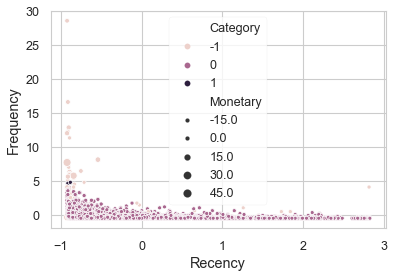

In [61]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="Recency", y="Frequency",
                     hue="Category",size="Monetary", data=dfDBSCAN)

In [62]:
#Menggunakan kategori  hassil DBSCAN,  dan sudah di scale 
dfDBSCAN.groupby('Category').mean()

,CustomerID,Recency,Monetary,Frequency
Category,,,,
-1,15289.509434,-0.436127,5.404240,4.787029
0,15565.915092,0.007151,-0.075105,-0.071634
1,15011.200000,-0.901588,0.741290,4.601619


In [63]:
#memasukan data yang belum di scale ke dalam hasil pengkategorian menggunakan DBSCAN agar mudah unuk di interpertasi
df_customerID_grouped['Category'] = dfDBSCAN['Category']

In [64]:
#
df_customerID_grouped.groupby('Category').mean()

,CustomerID,Recency,Monetary,Frequency
Category,,,,
-1,15289.509434,49.320755,42264.281887,38.735849
0,15565.915092,93.433860,1296.405807,3.730003
1,15011.200000,3.000000,7400.414000,37.400000


In [65]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [66]:
df_customerID_grouped.groupby('Category').agg([percentile(25),'min',percentile(75)])

CustomerID                            Recency                    \
         percentile_25    min percentile_75 percentile_25 min percentile_75   
Category                                                                      
-1             13777.0  12346       16446.0             2   1            22   
 0             14214.5  12747       16915.5            19   1           144   
 1             13263.0  13199       17315.0             2   2             4   

              Monetary                            Frequency                    
         percentile_25      min percentile_75 percentile_25 min percentile_75  
Category                                                                       
-1            12393.70  1296.44      54534.14            15   1            48  
 0              293.05     0.00       1502.82             1   1             4  
 1             6281.23  5704.97       7761.82            37  35            38

# K-Means Clustering

In [68]:
dfKMEANS = df_customerID_grouped.copy()

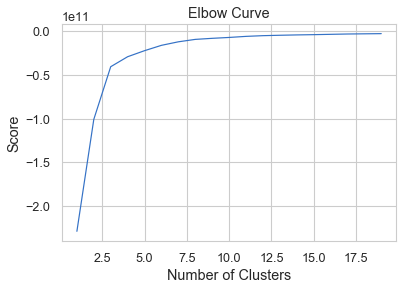

In [70]:
from sklearn.cluster import KMeans
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(dfKMEANS).score(dfKMEANS) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [136]:
#data fitting
kmeans = KMeans(n_clusters=4, random_state=101).fit(dfKMEANS)

In [137]:
# data frame tanpa scaler di beri column baru categori 
dfKMEANS['Category'] = kmeans.labels_

In [138]:
len(dfKMEANS)

3921

In [139]:
len(dfKMEANS[dfKMEANS.Category == 0])

3727

In [140]:
len(dfKMEANS[dfKMEANS.Category == 1])

3

In [141]:
len(dfKMEANS[dfKMEANS.Category == 2])

23

In [142]:
len(dfKMEANS[dfKMEANS.Category == 3])

168

In [143]:
len(dfKMEANS[dfKMEANS.Category == 4])

0

In [144]:
len(dfKMEANS[dfKMEANS.Category == 5])

0

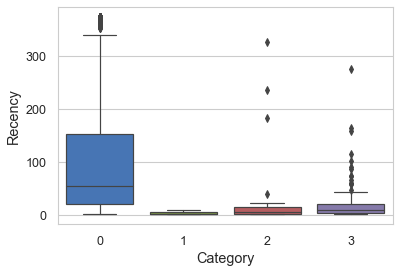

In [145]:
sns.boxplot(dfKMEANS['Category'],dfKMEANS.Recency)

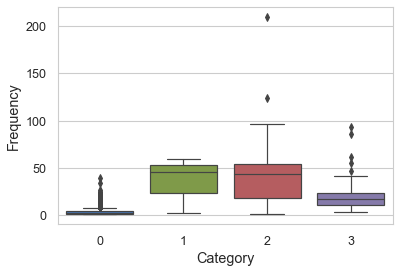

In [146]:
sns.boxplot(dfKMEANS['Category'],dfKMEANS.Frequency)

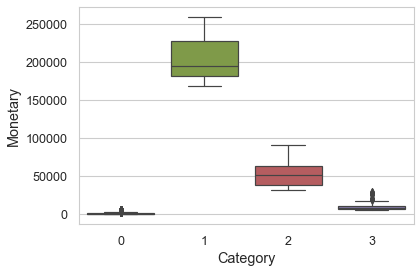

In [147]:
sns.boxplot(dfKMEANS['Category'],dfKMEANS.Monetary)

# Export Model

In [151]:
df_customerID_grouped.to_csv("cleanIqra.csv")